# Crime dataset 

##  DBScan Clustering 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import sklearn

In [2]:
crime = pd.read_csv("crime_data.csv")

In [22]:
crime.describe()

,Murder,Assault,UrbanPop,Rape,cluster
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,-0.420000
std,4.35551,83.337661,14.474763,9.366385,0.498569
min,0.80000,45.000000,32.000000,7.300000,-1.000000
25%,4.07500,109.000000,54.500000,15.075000,-1.000000
50%,7.25000,159.000000,66.000000,20.100000,0.000000
75%,11.25000,249.000000,77.750000,26.175000,0.000000
max,17.40000,337.000000,91.000000,46.000000,0.000000


In [21]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
cluster       0
dtype: int64

### Normalizing the datset 

In [3]:
def norm_func(i):
    x = (i-i.min())/ (i-i.max() - i.min())
    return(x)

In [4]:
norm = norm_func(crime.iloc[:,1:])
norm

,Murder,Assault,UrbanPop,Rape
0,-2.480000,-1.308219,-0.400000,-0.433022
1,-1.121951,-1.831933,-0.213333,-4.227273
2,-0.722772,-2.829545,-1.116279,-1.062780
3,-0.851064,-0.755208,-0.246575,-0.360947
4,-0.891304,-2.179245,-1.843750,-2.622047
5,-0.689320,-0.893258,-1.022222,-2.150685
6,-0.167785,-0.238971,-0.978261,-0.090047
7,-0.414634,-1.340278,-0.784314,-0.226667
8,-5.214286,-6.170213,-1.116279,-1.149533
9,-20.750000,-0.970760,-0.444444,-0.672727


###  DBScan Clustering Model 

In [16]:
dbscan = DBSCAN(eps=0.5, min_samples=5).fit_predict(norm)

In [17]:
new_col = pd.Series(dbscan)  
crime['cluster'] =  new_col
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [18]:
crime.iloc[:,1:].groupby(crime.cluster).mean()

,Murder,Assault,UrbanPop,Rape,cluster
cluster,,,,,
-1,11.866667,254.428571,68.571429,28.528571,-1
0,4.834483,110.172414,63.344828,15.948276,0


### Visualization 

Text(0.5, 1.0, 'Clusters using DBScan')

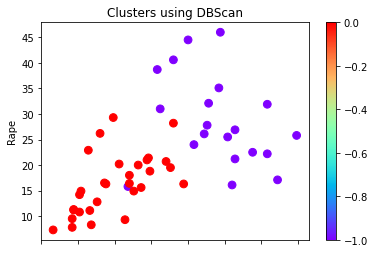

In [11]:
crime.plot(x="Murder",y ="Rape",c=dbscan,kind="scatter",s=60 ,cmap="rainbow") 
plt.title('Clusters using DBScan')   

In [12]:
sklearn.metrics.silhouette_score(crime.iloc[:,1:5],new_col)

0.5892954376969437

##  Inference

###   The countries belongs to cluster 0 has less crime rate compared to other countries 